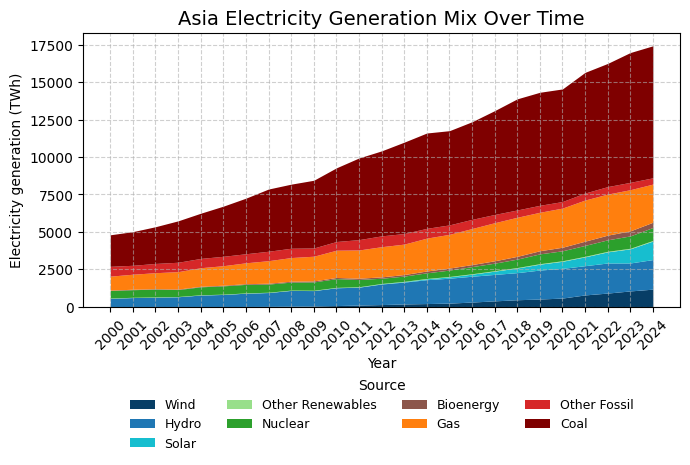

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_all = pd.read_csv("yearly_full_release_long_format.csv")

df_asia = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()


mix_asia = df_asia.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_asia = (
    mix_asia
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]


energy_order = [e for e in energy_order if e in mix_pivot_asia.columns]
mix_pivot_asia = mix_pivot_asia[energy_order]

energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_asia.columns]

fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_asia.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Asia Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_asia.index)
ax.set_xticklabels(mix_pivot_asia.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

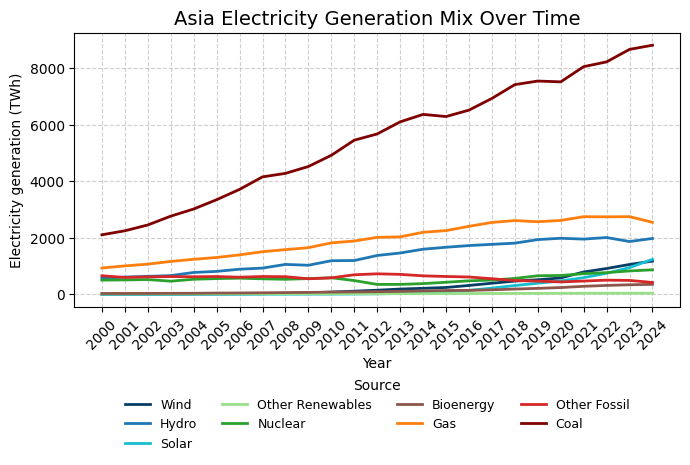

In [2]:
df_asia = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()

mix_asia = df_asia.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_asia = (
    mix_asia
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]


energy_order = [e for e in energy_order if e in mix_pivot_asia.columns]
mix_pivot_asia = mix_pivot_asia[energy_order]


energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_asia.columns]


fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_asia.plot(
    kind="line",
    stacked=False,
    linewidth=2,
    ax=ax,
    color=colors
)

ax.set_title("Asia Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_asia.index)
ax.set_xticklabels(mix_pivot_asia.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

In [3]:

df_asia_quota = mix_asia.copy()

df_asia_quota["Quota"] = (
    df_asia_quota["Value"] /
    df_asia_quota.groupby("Year")["Value"].transform("sum")
)


In [4]:

df_asia_quota.head()


,Year,Variable,Value,Quota
0,2000,Bioenergy,27.54,0.005730
1,2000,Coal,2106.74,0.438312
2,2000,Gas,931.16,0.193730
3,2000,Hydro,564.26,0.117395
4,2000,Nuclear,501.31,0.104299


In [5]:
df_asia_quota.groupby("Year")["Quota"].sum()


Year
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
2023    1.0
2024    1.0
Name: Quota, dtype: float64

In [6]:
mix_asia_aggregate = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Aggregate fuel") &
    (df_all["Unit"] == "TWh")
].copy()

mix_asia_aggregate.head()

,Area,ISO 3 code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
23,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Clean,TWh,0.31,NaN,NaN
24,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Fossil,TWh,0.17,NaN,NaN
25,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Gas and Other Fossil,TWh,0.17,NaN,NaN
26,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",TWh,0.31,NaN,NaN
27,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Renewables,TWh,0.31,NaN,NaN


In [7]:
df_asia_quota = mix_asia_aggregate.copy()

df_asia_quota["Quota"] = (
    df_asia_quota["Value"] /
    df_asia_quota.groupby("Year")["Value"].transform("sum")
)


df_asia_quota.head()


,Area,ISO 3 code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change,Quota
23,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Clean,TWh,0.31,NaN,NaN,0.000041
24,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Fossil,TWh,0.17,NaN,NaN,0.000022
25,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Gas and Other Fossil,TWh,0.17,NaN,NaN,0.000022
26,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",TWh,0.31,NaN,NaN,0.000041
27,Afghanistan,AFG,2000,Country or economy,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Renewables,TWh,0.31,NaN,NaN,0.000041


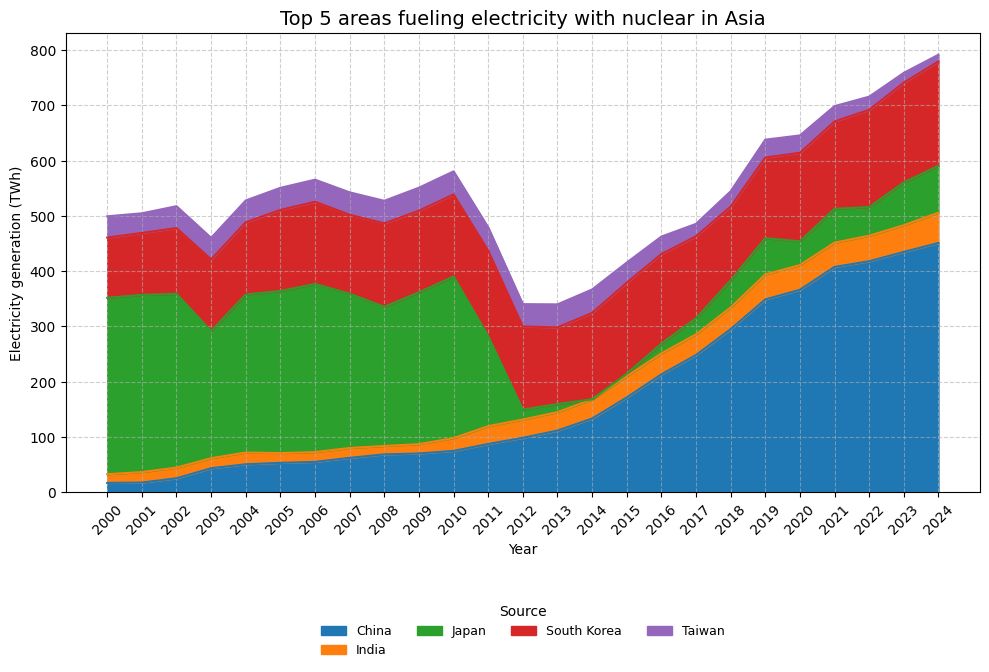

In [8]:
df_nuclear_asia = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Nuclear") &
    (df_all["Unit"] == "TWh")
].copy()
df_nuclear_asia.head()
nuclear_comparison_asia = df_nuclear_asia.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_nuclear = (
    nuclear_comparison_asia
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

nuclear_comparison_top5 = nuclear_comparison_asia[
    nuclear_comparison_asia["Area"].isin(top_5_areas_nuclear)]

mix_pivot_nuclear_Asia = (
    nuclear_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_nuclear_Asia.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with nuclear in Asia", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_nuclear_Asia.index)
ax.set_xticklabels(mix_pivot_nuclear_Asia.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


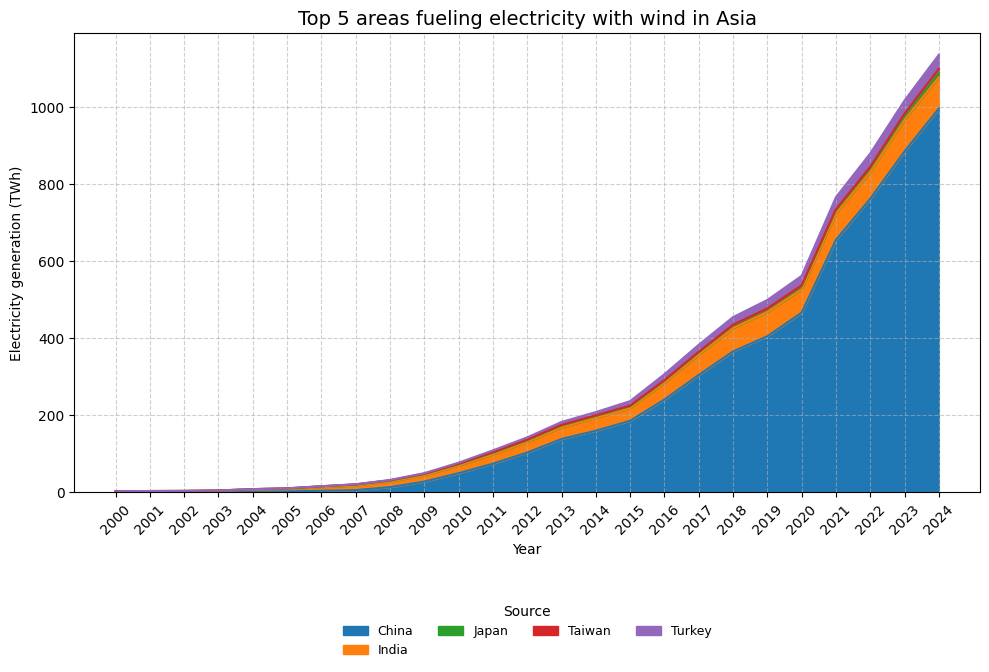

In [9]:
df_wind_asia = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Wind") &
    (df_all["Unit"] == "TWh")
].copy()

wind_comparison_asia = df_wind_asia.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_wind = (
    wind_comparison_asia
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

wind_comparison_top5 = wind_comparison_asia[
    wind_comparison_asia["Area"].isin(top_5_areas_wind)]
mix_pivot_wind_Asia = (
    wind_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_wind_Asia.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with wind in Asia", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_wind_Asia.index)
ax.set_xticklabels(mix_pivot_wind_Asia.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


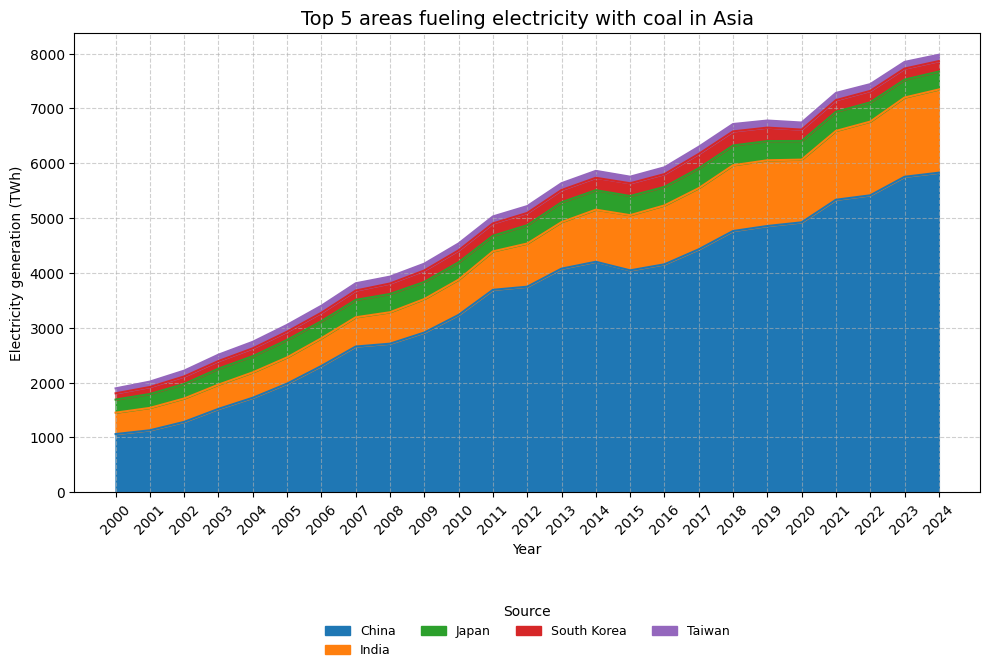

In [10]:
df_coal_asia = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Coal") &
    (df_all["Unit"] == "TWh")
].copy()

coal_comparison_asia = df_coal_asia.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_coals = (
    coal_comparison_asia
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

coal_comparison_top5 = coal_comparison_asia[
    coal_comparison_asia["Area"].isin(top_5_areas_coals)]
mix_pivot_coal_Asia = (
    coal_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_coal_Asia.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with coal in Asia", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_coal_Asia.index)
ax.set_xticklabels(mix_pivot_coal_Asia
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

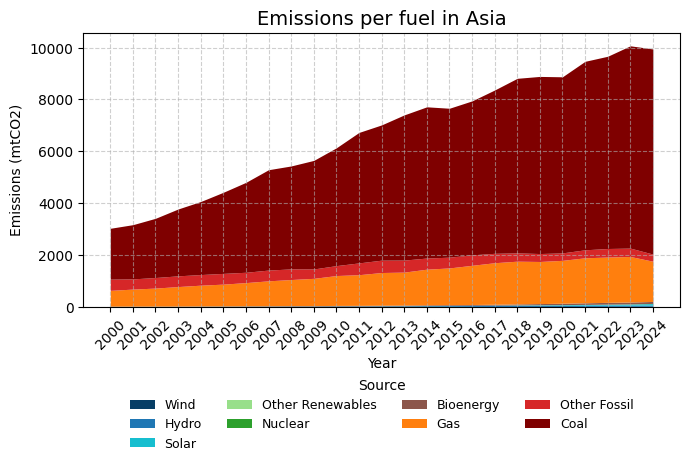

In [11]:
df_asia_emissions = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Power sector emissions") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "mtCO2")
].copy()

mix_asia_emissions = df_asia_emissions.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_asia_emissions = (
    mix_asia_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

energy_order = [e for e in energy_order if e in mix_pivot_asia_emissions.columns]
mix_pivot_asia_emissions = mix_pivot_asia_emissions[energy_order]


energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_asia_emissions.columns]

fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_asia_emissions.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Emissions per fuel in Asia", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (mtCO2)")

ax.set_xticks(mix_pivot_asia_emissions.index)
ax.set_xticklabels(mix_pivot_asia_emissions.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

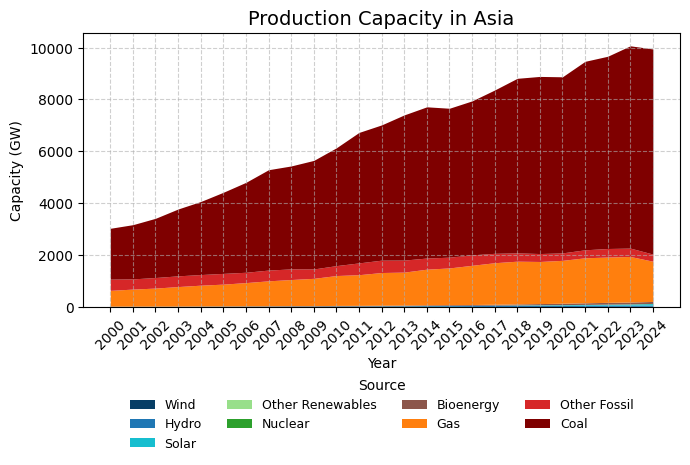

In [12]:
df_asia_capacity = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Capacity") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "GW")
].copy()

mix_asia_capacity = df_asia_capacity.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_asia_capacity = (
    mix_asia_capacity
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]


energy_order = [e for e in energy_order if e in mix_pivot_asia_capacity.columns]
mix_pivot_asia_capacity = mix_pivot_asia_capacity[energy_order]


energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_asia_emissions.columns]


fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_asia_emissions.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Production Capacity in Asia", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Capacity (GW)")

ax.set_xticks(mix_pivot_asia_emissions.index)
ax.set_xticklabels(mix_pivot_asia_emissions.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)


ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

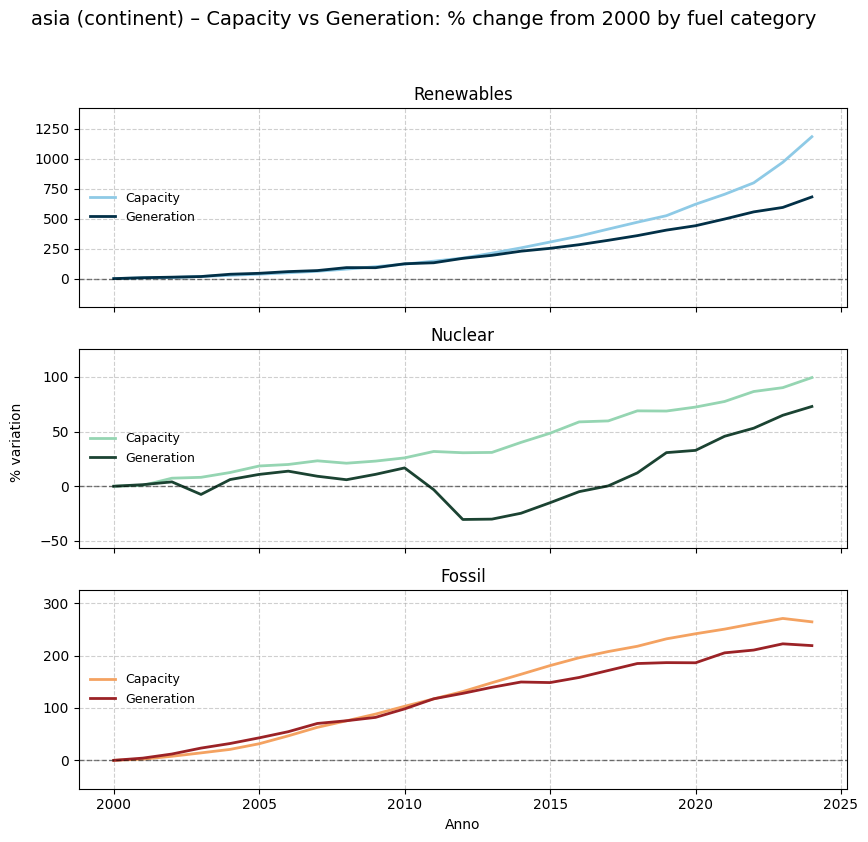

In [13]:
df_asia_capacity_gw = df_asia_capacity[
    df_asia_capacity["Unit"] == "GW"
].copy()

cap_eu = (
    df_asia_capacity_gw
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)


df_asia_prod_twh = df_asia[
    df_asia["Unit"] == "TWh"
].copy()

prod_eu = (
    df_asia_prod_twh
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

fuel_to_group = {
    "Wind": "Renewables",
    "Hydro": "Renewables",
    "Solar": "Renewables",
    "Other Renewables": "Renewables",
    "Bioenergy": "Renewables",
    "Nuclear": "Nuclear",
}

cap_eu["Category"] = cap_eu["Variable"].map(fuel_to_group).fillna("Fossil")
prod_eu["Category"] = prod_eu["Variable"].map(fuel_to_group).fillna("Fossil")


cap_cat = (
    cap_eu
    .groupby(["Year", "Category"], as_index=False)["Value"]
    .sum()
)

prod_cat = (
    prod_eu
    .groupby(["Year", "Category"], as_index=False)["Value"]
    .sum()
)


def percent_change_from_2000(df, level_col="Category", base_year=2000):
    base = (
        df[df["Year"] == base_year]
        .groupby(level_col)["Value"]
        .sum()
    )

    df = df.copy()
    df["Base_2000"] = df[level_col].map(base)
    df["Pct_change"] = (df["Value"] / df["Base_2000"] - 1) * 100

    return df

capacity_pct = percent_change_from_2000(cap_cat)
production_pct = percent_change_from_2000(prod_cat)

capacity_pct["Metric"] = "Capacity"
production_pct["Metric"] = "Generation"

df_pct = pd.concat([capacity_pct, production_pct], ignore_index=True)


color_map = {
    ("Renewables", "Capacity"):   "#8ecae6",
    ("Renewables", "Generation"): "#023047",
    ("Nuclear", "Capacity"):      "#95d5b2",
    ("Nuclear", "Generation"):    "#1b4332",
    ("Fossil", "Capacity"):       "#f4a261",
    ("Fossil", "Generation"):     "#9b2226",
}

categories = ["Renewables", "Nuclear", "Fossil"]


fig, axes = plt.subplots(
    nrows=3, ncols=1,
    figsize=(9, 9),
    sharex=True,
    sharey=False
)

for ax, cat in zip(axes, categories):
    df_cat = df_pct[df_pct["Category"] == cat]

    for metric in ["Capacity", "Generation"]:
        df_m = (
            df_cat[df_cat["Metric"] == metric]
            .sort_values("Year")
        )

        if df_m.empty or df_m["Base_2000"].isna().all():
            continue

        ax.plot(
            df_m["Year"],
            df_m["Pct_change"],
            label=metric,
            linewidth=2,
            color=color_map[(cat, metric)]
        )


    ax.axhline(0, linestyle="--", linewidth=1, color="black", alpha=0.5)

    ax.set_title(cat, fontsize=12)
    ax.grid(True, axis="both", linestyle="--", alpha=0.6)


    yvals = df_cat["Pct_change"].dropna()
    if not yvals.empty:
        ymin, ymax = yvals.min(), yvals.max()
        ymin = min(ymin, 0)
        ymax = max(ymax, 0)
        pad = (ymax - ymin) * 0.2 if ymax != ymin else 10
        ax.set_ylim(ymin - pad, ymax + pad)

    ax.legend(
        loc="center left",
        frameon=False,
        fontsize=9
    )


axes[-1].set_xlabel("Anno")
fig.text(
    0.04, 0.5,
    "% variation",
    va="center",
    rotation="vertical"
)

fig.suptitle(
    "asia (continent) – Capacity vs Generation: % change from 2000 by fuel category",
    fontsize=14,
    y=0.98
)

plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()